<a href="https://colab.research.google.com/github/xslobo05/MPA-MLF/blob/main/Lab_02_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excersise 1

[[7.64920772 7.48502209]
 [       nan        nan]
 [       nan        nan]]


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


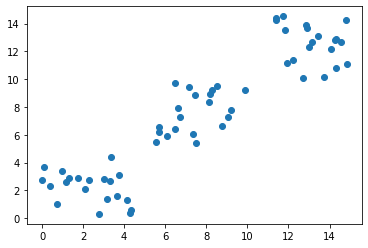

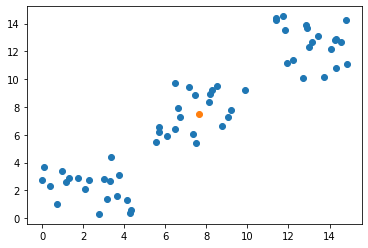

In [1]:
import matplotlib.pyplot as plt
import copy
import numpy as np

# fuction for generating points

def split_points(points: np.array, n_of_point_groups: int) -> np.array:
    changed_points = copy.copy(points)
    index = np.arange(len(points))
    groups_index = np.split(index, n_of_point_groups)
    
    for id_group,group_index in enumerate(groups_index):
        changed_points[group_index] = points[group_index] + 5*id_group
    
    return changed_points

# generate points

n_of_points = 60
points = np.random.rand(n_of_points,2) * 5 
points = split_points(points, 3)

plt.figure()
plt.scatter(points[:,0],points[:,1])

# specify number of clusters

k = 3

# initialize centroids

def initialize_clusters(points: np.array, k_clusters: int) -> np.array:
    vector_with_all_ind = np.arange(points.shape[0])
    vector_with_all_ind = np.random.permutation(vector_with_all_ind)
    
    return vector_with_all_ind[:k_clusters]

#init_clusters = initialize_clusters(points, k)

# calculate distance from centroids to to all points in dataset

# function to calculate distance from one centroid to all points
def calculate_metric(points: np.array, centroid: np.array) -> np.array:
   return np.square(np.linalg.norm(points - centroid, axis = 1))

# function to calculate all distances
def compute_distances(points: np.array, centroids_points: np.array) -> np.array:
   return np.asarray([calculate_metric(points,centroid) for centroid in centroids_points])

# function to assign to closest centroids
def assign_centroids(distances: np.array) -> np.array:
    
    return np.argmin(distances,axis=0)

#test = compute_distances(points,init_clusters)
#print(test)
#cluster_belongs = assign_centroids(compute_distances(points,init_clusters))
#print(cluster_belongs)

# calculate objective function J

def calculate_objective(cluster_belongs: np.array, distances: np.array) -> np.array:
    distances = distances.T
    sel_min = distances[np.arange(len(distances)),cluster_belongs]
    return np.sum(sel_min)

#j = calculate_objective(cluster_belongs, compute_distances(points,init_clusters))
#print(j)

# compute new centroids

def calculate_new_centroids(points: np.array, clusters_belongs: np.array, n_of_clusters: int) -> np.array:
    new_clusters = []
    for cluster_id in range(n_of_clusters):
      p = np.where(clusters_belongs == cluster_id)
      #print(p)
      points_sel = points[p]
      new_clusters.append(np.mean(points_sel, axis=0))
      
    return np.array(new_clusters)

# repeat

def fit(points: np.array, n_of_centroids: int, n_of_iterations: int, error: float = 0.001) -> tuple:
    centroid_points = initialize_clusters(points, n_of_centroids)
    last_j = 10000
    
    for n in range(n_of_iterations):
        distances = compute_distances(points, centroid_points)
        cluster_belongs = np.argmin(distances,axis=0)

        j = calculate_objective(cluster_belongs, distances)
        if abs(last_j - j ) < error:
          break

        last_j = j
        centroid_points = calculate_new_centroids(points, cluster_belongs, n_of_centroids)
    
    return centroid_points, last_j

# complete run

n_of_iterations = 100
centroids,_ = fit(points, k, n_of_iterations)
print(centroids)
plt.figure()
plt.scatter(points[:,0],points[:,1])
plt.scatter(centroids[:,0].T,centroids[:,1].T)